# 파이썬 OpenCV를 이용한 영상처리_허진경
* Jupyter Notebook Info
>- Dayoung Yun
>- 2021/11/18
## 2장 영상 기본 연산
### 영상 기본 정보
#### 영상 기본 속성
>- OpenCV의 imread()함수를 이용해서 이미지를 읽으면 넘파이 배열로 반환
>- 배열을 잘 다뤄야 한다 -> 넘파이 패키지를 잘 다뤄야 한다

In [1]:
import cv2

img = cv2.imread('Tori.jpeg')
print('img.shape')

img.shape


In [2]:
print(img[0,0])

[236 240 255]


In [3]:
print(img.size)

151122


In [4]:
print(img.dtype)

uint8


#### 영상 화소 처리하기
>- 그레이스케일 이미지일 경우 shape 속성은 이미지의 행의 수와 열의 수 반환
>- 이미지의 높이(height) : 행의 수, 이미지의 폭(width) : 열의 수
>- 오른쪽으로 갈수록 화소의 x인덱스가 증가, 아래쪽으로 갈수록 y인덱스 증가, img[y,x]
>- 코드를 함수로 구현 해 놓으면 재사용성을 높일 수 있음

In [5]:
import cv2

img = cv2.imread('Tori.jpeg', cv2.IMREAD_GRAYSCALE)
height, width = img.shape

for y in range(height):
    for x in range(width):
        if(y%2==0):
            img[y,x]=0

In [6]:
for y in range(height):
    if(y%2==0):
        img[y, : ]=0

In [7]:
cv2.imshow('Tori', img)
cv2.waitKey()
cv2.destroyAllWindows()

#### 함수만들어 사용하기
>- 이미지의 짝수 행을 검은색 선으로 만드는 함수
>- 이미지처리 함수와 이미지 객체를 인수로 받아 화면으로 출력하는 코드

In [8]:
import numpy as np

# 이미지의 짝수 행을 검은색 선으로 만드는 함수

def black_lines(img):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype = np.uint8)
    
    for y in range(height):
        if(y%2==0):
            img_[y, :] = 0
        else:
            img_[y,:]=img[y,:]
    return img_

In [9]:
# 이미지처리 함수와 이미지 객체를 인수로 받아 화면으로 출력하는 코드

def img_pro(func, img, *args, show = True, **kwargs):
    img_ = func(img, *args, **kwargs)
    if show:
        cv2.imshow('Image', img_)
        cv2.waitKey()
        cv2.destroyAllWindows()
    else:
        return img_

In [10]:
import cv2
img = cv2.imread('Tori.jpeg', cv2.IMREAD_GRAYSCALE)
img_pro(black_lines, img)

In [11]:
import cv2 
import matplotlib.pyplot as plt

def img_pro2(func, img, *args, show = True, win = False, **kwargs):
    img_ = func(img, *args, **kwargs)
    if show:
        if win:
            cv2.imshow('Image', img_)
            cv2.waitKey()
            cv2.destroyAllWindows()
        else:
            fig, axes = plt.subplots(1,2)
            axes[0].imshow(img, cmap = 'gray')
            axes[1].axis('off'), axes[0].set_title('origin')
            axes[1].imshow(img_, cmap = 'gray', interpolation = None)
            axes[1].axis('off'), axes[1].set_title('target')
    else:
        return img_

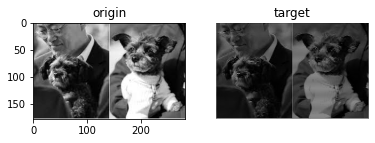

In [12]:
img = cv2.imread('Tori.jpeg', cv2.IMREAD_GRAYSCALE)
img_pro2(black_lines, img)

#### ROI
>- 화소단위 처리보다 특정영역 단위로 작업
>- 원본 이미지에서 처리할 관심 영역 : ROI(Region Of Interest)
>- 넘파이, 인덱싱 방법 사용
>- img[y_from : y_to, x_from : x_to]

In [13]:
import cv2

img = cv2.imread('Tori.jpeg')
temp = img[100: 150, 100:160]

cv2.imshow('img', img)
cv2.imshow('roi_img', temp)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 기본연산
### 이미지채널
>- B, G, R
>- cv2.split() 을 이용해서 채널 분리

In [14]:
import cv2
import numpy as np

img = cv2.imread('Tori.jpeg')
b, g, r = cv2.split(img)
print(np.mean(b), np.mean(g), np.mean(r), sep = ',')

101.40441497597968,98.1711200222337,100.23309643863898


In [15]:
img = cv2.imread('Tori.jpeg')
img[:,:,[0,1]] = 0

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 합치기
#### cv2.add(), numpy.add()

In [16]:
# OpenCV의 add() 함수와 넘파이 add()함수의 실행결과 비교

import cv2 
import numpy as np

img1 = cv2.imread('flower1.jpeg')
img2 = cv2.imread('flower2.jpeg')

cv2.imshow('Image1', img1)
cv2.imshow('Image2', img2)
cv2.imshow('cv2.add', cv2.add(img1, img2))
cv2.imshow('np.add', np.add(img1, img2))
cv2.waitKey(0)

cv2.destroyAllWindows()

#### 이미지 블랜딩
>- 두 이미지를 하나의 이미지로 합칠때 두 이미지에 가중치를 두어 합치면 가중치가 더 큰 이미지가 상대적으로 더 뚜렷하게 보이도록 할 수 있음

In [17]:
import numpy as np

def weighted_blending(img1, img2, img1_weight = 0.5):
    output = np.zeros(img1.shape, dtype = np.uint8)
    height, width = img1.shape[0:2]
    if len(img1.shape) == 2:
        for y in range(height):
            for x in range(width):
                output[y,x] = int(img1[y,x] * img1_weight + img2[y,x] * (1-img_weight))
                
    elif len(img1.shape) == 3:
        for y in range(height):
            for x in range(width):
                blended = img1[y,x] * img1_weight + img2[y, x] * (1-img1_weight)
                output[y,x] = blended.astype(np.uint8)

                
    return output

In [18]:
img1 = cv2.imread('flower1.jpeg')
img2 = cv2.imread('flower2.jpeg')

new_img = weighted_blending(img1, img2, img1_weight = 0.7)

cv2.imshow('Image1', img1)
cv2.imshow('Image2', img2)
cv2.imshow('Blended', new_img)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [19]:
# 브로드캐스팅 규칙을 이용하여 가중치 부여 이미지 블랜딩

import numpy as np

def ez_blending(img1, img2, img1_weight = 0.5):
    output = img1 * img1_weight + img2 *(1-img1_weight)
    return output.astype(np.unit8)

In [20]:
# 비트연산

import cv2

logo = cv2.imread('logo.png')
lena = cv2.imread('lena.jpeg')

rows, cols, channels = logo.shape
roi = lena[50:rows+50, 50:cols+50]

logogray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(logogray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

In [21]:
# 비트반전에 사용하는 함수 : cv2.bitwise_not()

cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('ROI', roi)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [22]:
logo_fg = cv2.bitwise_and(logo, logo, mask = mask)
lena_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)

dst = cv2.add(logo_fg, lena_bg)

lena[50:rows+50, 50:cols+50] = dst

cv2.imshow('result', lena)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### cv2.seamlessClone(src, dst, mask, point, flags)
>- 두 이미지가 조화되어 합쳐지길 원할 때 비트연산 이용
>- cv2.NORMAL_CLONE()
>- cv2.MIXED_CLONE  : 훨씬 자연스러움

In [23]:
import cv2
import numpy as np

logo = cv2.imread('logo.png')
lena = cv2.imread('lena.jpeg')
mask = np.full_like(logo, 255)

height, width = lena.shape[:2]
center = (width//2, height //2)

normal = cv2.seamlessClone(logo, lena, mask, center, cv2.NORMAL_CLONE)
mixed = cv2.seamlessClone(logo, lena, mask, center, cv2.MIXED_CLONE)

cv2.imshow('normal', normal)
cv2.imshow('mixed', mixed)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [24]:
import cv2
import numpy as np

src = cv2.imread('airplane2.jpeg')
dst = cv2.imread('red_sky.jpeg')

src_mask = np.zeros(src.shape, src.dtype)
poly = np.array([[0,40],[150,60], [203,56],[200,100], [88,103], [1,75]], np.int32)

cv2.fillPoly(src_mask, [poly], (255,255,255))

center = (600,150)
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)

cv2.imshow('Output', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 이진화
>- 임계값을 이용해서 이미지를 이진화하는 것은 영상처리에서 자주 사용되는 기술

#### 이진화
>- 배열 브로드캐스팅규칙과 True/False가 1과0으로 계산 될 수 있다는 것을 이용해서 이미지 임계처리를 쉽게 할 수 있음

In [25]:
import cv2
import numpy as np

def two_tone(img, threshold = 128):
    output = (img > threshold) * 255
    return output.astype(np.uint8)
img = cv2.imread('lena.jpeg',0)
new_img = two_tone(img, threshold = 120)

cv2.imshow('img', new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### cv2.threshold(src, thresh, maxValue, thresholdType) ->ret, dst(임계값과 결과이미지)
>-grayscale 이미지를 쉽게 이진화 가능

In [26]:
! pip install -U pip
! pip install -U matplotlib

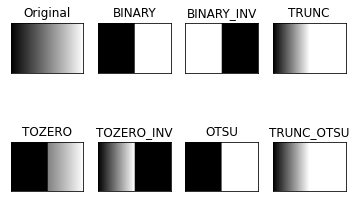

In [28]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('gradation.png',0)
_, bin1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, bin2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, bin3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, bin4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, bin5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
_, bin6 = cv2.threshold(img, -1, 255, cv2.THRESH_OTSU)
_, bin7 = cv2.threshold(img, -1, 255, cv2.THRESH_TRUNC | cv2.THRESH_OTSU)

titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV', 'OTSU', 'TRUNC_OTSU']

images = [img, bin1, bin2, bin3, bin4, bin5, bin6, bin7]

for i in range(8):
    
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

#### 적응 임계처리
>- cv.adaptiveTrheshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)->dst
>- 임계값을 이미지 전체에 적용하여 처리하기 때문에 하나의 이미지에 음영이 다르면 일부 영역이 모두 흰색 또는 검은색으로 보이게 됨

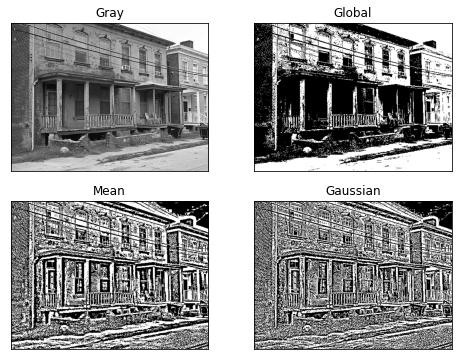

In [29]:
import cv2
from matplotlib import pyplot as plt

img_gray = cv2.imread('house-320x240.jpeg',0)
_, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
adt_mean = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 0)
adt_gaus = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 0)

titles = ['Gray', 'Global', 'Mean', 'Gaussian']
images = [img_gray, img_bin, adt_mean, adt_gaus]

plt.figure(figsize = (8,6))
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

#### 디더링
>- 제한된 색을 이용하여 음영이나 색을 나타내는 기법, 검정색, 흰색 점으 밀조 조합을 이용하여 2진화 가능
>- 플로이드-스테이버그 디더링, 평균디더링, 순서디더링, 임의 디더링 등이 있음
>- 플로이드 스테이버그 디더링 : 화소의 양자화 오류를 주위의 화소로 분산 시킴으로써 디더링 수행 

In [30]:
def minmax(pixel):
    if pixel > 255:
        pixel = 255
    if pixel < 0:
        pixel = 0
    return pixel

import numpy as np

def dithering(img):
    height, width = img.shape
    
    for y in range(0, height -1):
        for x in range(1, width-2):
            p = img[y,x]
            new_p = np.round(p/255)*255
            img[y,x] = new_p
            error = p - new_p
            img[y, x+1] = minmax(img[y, x+1] + error *7 /16)
            img[y+1, x-1] = minmax(img[y+1, x-1] + error * 3 /16)
            img[y+1, x] = minmax(img[y+1, x] + error * 5 /16)
            img[y+1, x+1] = minmax(img[y+1, x+1] + error * 1 /16)
    return img

In [32]:
lena = cv2.imread('lena.jpeg', cv2.IMREAD_GRAYSCALE)
lena_dithering = dithering(lena.copy())
cv2.imshow('Lena grayscale', lena)
cv2.imshow('Lena dithering', lena_dithering)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 히스토그램
#### 이미지히스토그램
>- 가로축에 화소값, 세로축에 화소의 수를 이용하여 막대그래프 그림
>- 화소의 값의 범위는  0~255이지만 실제 화소들이 분포된 범위는 다를 수 있음

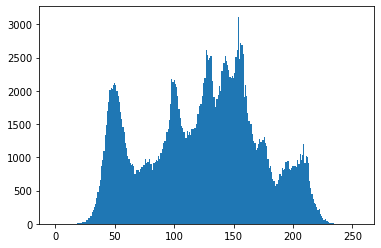

In [36]:
import cv2
img = cv2.imread('lena.jpeg', flags = cv2.IMREAD_GRAYSCALE)

import numpy as np

hist = np.zeros((256))

for y in range(height):
    for x in range(width):
        hist[img[y,x]] = hist[img[y,x]] + 1
        
        
import matplotlib.pyplot as plt
plt.bar(x = range(256), height = hist, width = 1)
plt.show()

### 히스토그램 함수 구현

In [37]:
import numpy as np

def histogram(img):
    height, width = img.shape
    hist_ = np.zeros(256)
    
    for y in range(height):
        for x in range(width):
            hist_[img[y,x]] = hist_[img[y,x]] + 1
            
    return hist_

In [45]:
#히스토그램 배열을 입력받아 히스토그램을 이미지 객체로 만들어 반환하는 함수

import numpy as np

def histogram_img(hist):
    hist_height = 150
    hist_img = np.full((hist_height,256), 255, dtype = np.uint8)
    hist = hist.astype(int)
    hist_max = max(hist)
    
    for i, value in enumerate(hist):
        height = -int(value * (hist_height/hist_max))
        if height <-1:
            hist_img[height:,i] = 0
    return hist_img

In [46]:
import cv2

img = cv2.imread('lena.jpeg', flags = cv2.IMREAD_GRAYSCALE)
hist = histogram(img)
hist_img = histogram_img(hist)

cv2.imshow('Histogram', hist_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### cv2.calcHist()
>- cv2.calcHist(images, channels, mask, histSize, ranges) -> histo

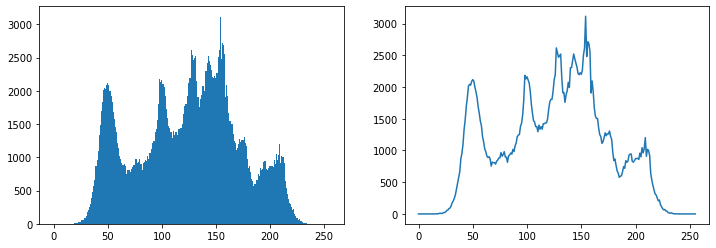

In [47]:
import cv2
import matplotlib.pyplot as plt

lena_gray = cv2.imread('lena.jpeg', 0)

plt.figure(figsize = ( 12, 4))
plt.subplot(121)
plt.bar(x = range(256), height = histogram(lena_gray), width = 1)

plt.subplot(122)
hist = cv2.calcHist(images = [lena_gray], channels = [0], mask = None, histSize = [256], ranges = [0,256])
plt.plot(hist.flatten())
plt.show()

### 채널
>- 한 개 화소가 가지고 있는 정보
>- 그레이스케일은 채널이 1개, RGB는 채널이 3개
>- 0 : Blue, 1 : Green, 2 : Red

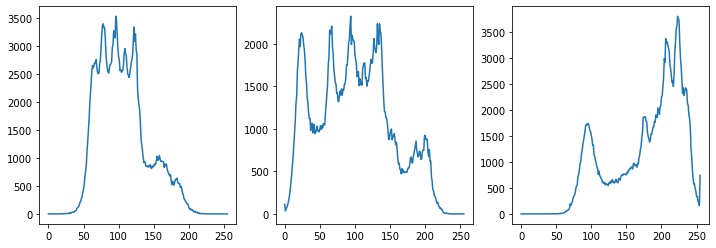

In [50]:
lena = cv2.imread('lena.jpeg')

plt.figure(figsize = (12,4))
plt.subplot(131)
hist1 = cv2.calcHist(images = [lena], channels = [0], mask = None, histSize = [256], ranges = [0,256])
plt.plot(hist1.flatten())

plt.subplot(132)

hist1 = cv2.calcHist(images = [lena], channels = [1], mask = None, histSize = [256], ranges = [0,256])

plt.plot(hist1.flatten())

plt.subplot(133)

hist1 = cv2.calcHist(images = [lena], channels = [2], mask = None, histSize = [256], ranges = [0,256])

plt.plot(hist1.flatten())

plt.show()

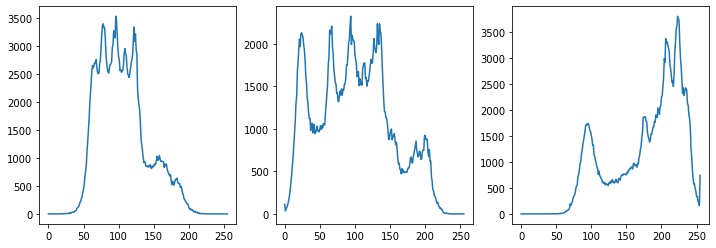

In [51]:
lena = cv2.imread('lena.jpeg')
plt.figure(figsize = (12,4))

for i in range(3):
    plt.subplot(1, 3, i+1)
    hist = cv2.calcHist(images = [lena], channels = [i], mask = None, histSize = [256], ranges = [0,256])
    plt.plot(hist.flatten())
    
plt.show()